In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_orig = pd.read_csv('Mall_Customers.csv')

In [3]:
df = df_orig.copy()

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Spending Score is something you assign to the customer
# based on your defined parameters like customer behavior and purchasing data.

In [6]:
# do some EDA and see interesting things about features

In [7]:
#split up the ages into groups

In [8]:
pd.DataFrame(pd.cut(df['Age'], bins=12).value_counts())

,Age
"(26.667, 31.0]",30
"(31.0, 35.333]",28
"(17.948, 22.333]",25
"(35.333, 39.667]",18
"(44.0, 48.333]",17
"(48.333, 52.667]",16
"(39.667, 44.0]",15
"(22.333, 26.667]",15
"(65.667, 70.0]",12
"(52.667, 57.0]",10


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


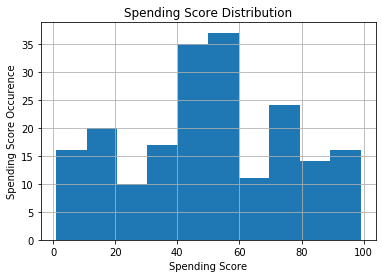

In [10]:
# See Spending Distribution
df['Spending Score (1-100)'].hist();
plt.title('Spending Score Distribution');
plt.ylabel('Spending Score Occurence');
plt.xlabel('Spending Score');

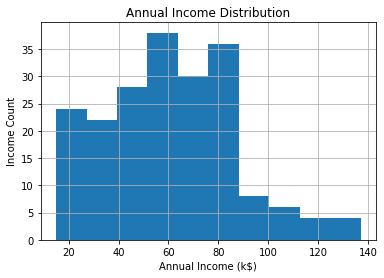

In [11]:
# See income Distribution
df['Annual Income (k$)'].hist();
plt.title('Annual Income Distribution');
plt.ylabel('Income Count');
plt.xlabel('Annual Income (k$)');

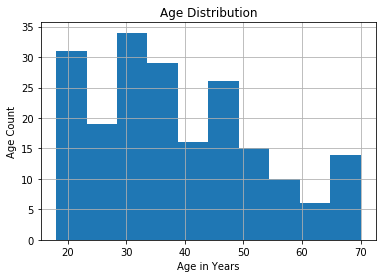

In [12]:
# See age distribution
df['Age'].hist()
plt.title('Age Distribution');
plt.ylabel('Age Count');
plt.xlabel('Age in Years');

In [13]:
# Check to see if there is an imbalance
df['Gender'].value_counts(True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [14]:
# see how many records are in the dataset
df.shape

(200, 5)

In [15]:
# There are only 200 records in the dataset
# see the customer age range
df.sort_values(by = 'Age',ascending=True)
# The customer age range is from 18-70

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
114,115,Female,18,65,48
91,92,Male,18,59,41
65,66,Male,18,48,59
33,34,Male,18,33,92
0,1,Male,19,15,39
162,163,Male,19,81,5
138,139,Male,19,74,10
115,116,Female,19,65,50
113,114,Male,19,64,46
111,112,Female,19,63,54


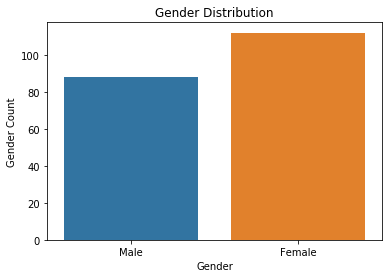

In [16]:
sns.countplot(x='Gender', data=df);
plt.title('Gender Distribution');
plt.ylabel('Gender Count');

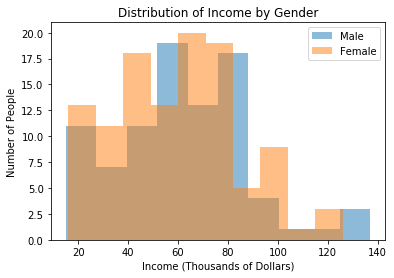

In [17]:
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.ylabel('Number of People')
plt.legend();

In [18]:
# Group by age and see the average spending score
avg_age_spd_scr = df.groupby(['Age','Gender','Spending Score (1-100)']).agg({'Annual Income (k$)':'mean'}).reset_index()

In [19]:
avg_age_spd_scr.head()

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
1,18,Male,41,59.0
2,18,Male,59,48.0
3,18,Male,92,33.0
4,19,Female,50,65.0


In [20]:
avg_age_spd_scr[avg_age_spd_scr['Gender'] == "Female"]

,Age,Gender,Spending Score (1-100),Annual Income (k$)
0,18,Female,48,65.0
4,19,Female,50,65.0
5,19,Female,54,63.0
12,20,Female,6,16.0
13,20,Female,75,37.0
17,21,Female,42,62.0
18,21,Female,57,54.0
19,21,Female,73,30.0
20,21,Female,81,33.0
22,22,Female,55,57.0


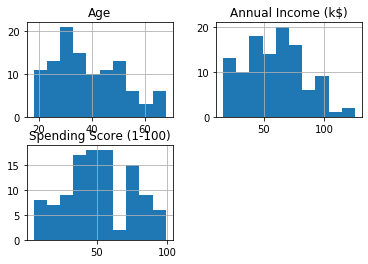

In [21]:
avg_age_spd_scr[avg_age_spd_scr['Gender'] == "Female"].hist();

In [22]:
avg_age_spd_scr.Age.mean()

38.857142857142854

In [23]:
avg_age_spd_scr['Spending Score (1-100)'].mean()

50.13775510204081

In [24]:
df['Spending Score (1-100)'].mean()

50.2

In [25]:
avg_age_spd_scr[avg_age_spd_scr['Gender']=='Male'].shape

(87, 4)

In [26]:
males_grouped = avg_age_spd_scr[avg_age_spd_scr['Gender']=='Male']
females_grouped = avg_age_spd_scr[avg_age_spd_scr['Gender']=='Female']

In [27]:
males_grouped.head()

,Age,Gender,Spending Score (1-100),Annual Income (k$)
1,18,Male,41,59.0
2,18,Male,59,48.0
3,18,Male,92,33.0
6,19,Male,5,81.0
7,19,Male,10,74.0


In [28]:
males_avg_spend_score = males_grouped.groupby(['Annual Income (k$)','Age']).agg({'Spending Score (1-100)':'mean'}).reset_index()

In [29]:
males_avg_spend_score.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,15.0,19,39.0
1,15.0,21,81.0
2,19.0,64,3.0
3,19.0,67,14.0
4,20.0,22,79.0


In [30]:
females_avg_spend_score = females_grouped.groupby(['Annual Income (k$)','Age']).agg({'Spending Score (1-100)':'mean'}).reset_index()

In [31]:
females_avg_spend_score.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,16.0,20,6.0
1,16.0,23,77.0
2,17.0,22,76.0
3,17.0,31,40.0
4,18.0,23,94.0


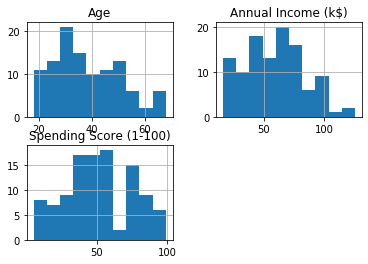

In [32]:
females_avg_spend_score.hist();

In [33]:
females_avg_spend_score.shape

(108, 3)

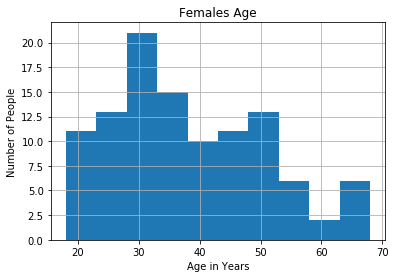

In [34]:
females_avg_spend_score.Age.hist();
plt.title('Females Age');
plt.xlabel('Age in Years');
plt.ylabel('Number of People');

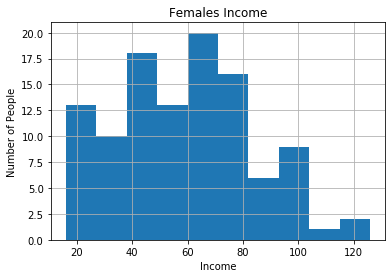

In [35]:
females_avg_spend_score['Annual Income (k$)'].hist();
plt.title('Females Income');
plt.xlabel('Income');
plt.ylabel('Number of People');

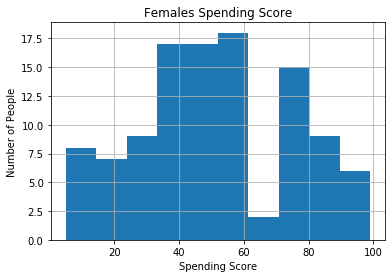

In [36]:
females_avg_spend_score['Spending Score (1-100)'].hist();
plt.title('Females Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');

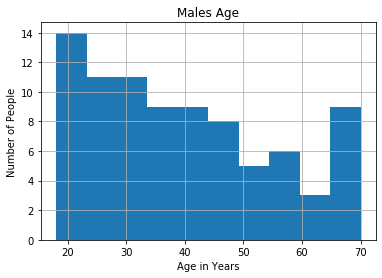

In [37]:
males_avg_spend_score.Age.hist();
plt.title('Males Age');
plt.xlabel('Age in Years');
plt.ylabel('Number of People');

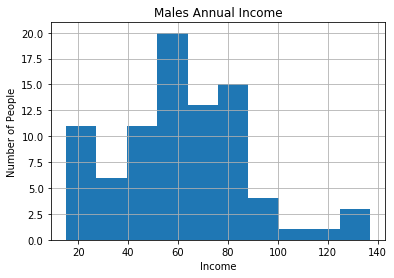

In [38]:
males_avg_spend_score['Annual Income (k$)'].hist();
plt.title('Males Annual Income');
plt.xlabel('Income');
plt.ylabel('Number of People');

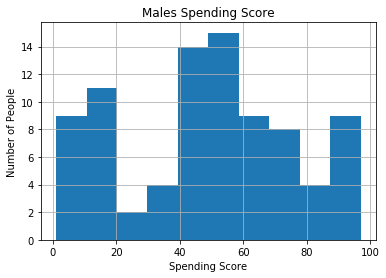

In [39]:
males_avg_spend_score['Spending Score (1-100)'].hist();
plt.title('Males Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');

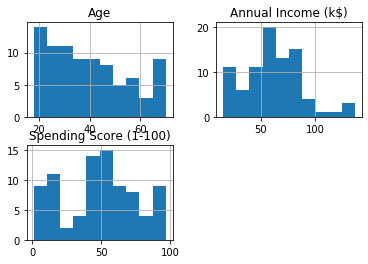

In [40]:
males_avg_spend_score.hist();

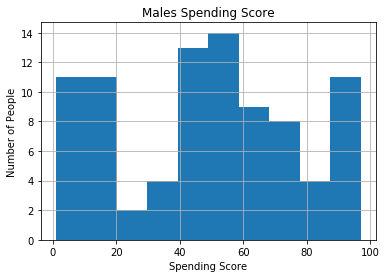

In [41]:
males_grouped['Spending Score (1-100)'].hist();
plt.title('Males Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');

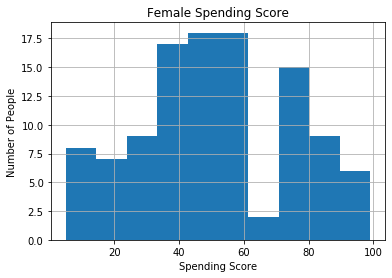

In [42]:
females_grouped['Spending Score (1-100)'].hist();
plt.title('Female Spending Score');
plt.xlabel('Spending Score');
plt.ylabel('Number of People');
# we can see that female spending score is more normal than males.
#Possibly means women buy more items and shop more frequently

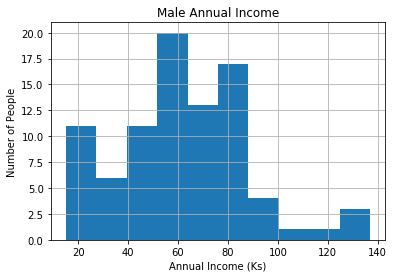

In [43]:
males_grouped['Annual Income (k$)'].hist()
plt.title('Male Annual Income');
plt.xlabel('Annual Income (Ks)');
plt.ylabel('Number of People');

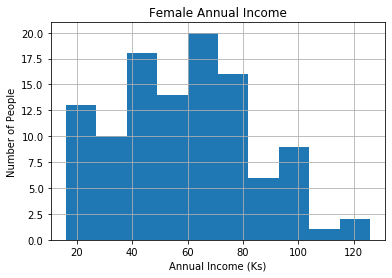

In [44]:
females_grouped['Annual Income (k$)'].hist()
plt.title('Female Annual Income');
plt.xlabel('Annual Income (Ks)');
plt.ylabel('Number of People');

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Find a way to bin the ages

In [51]:
age_bins = [18,27,36,45,54,63,72,80]
df['binned'] = pd.cut(df['Age'], age_bins)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),binned
0,1,Male,19,15,39,"(18, 27]"
1,2,Male,21,15,81,"(18, 27]"
2,3,Female,20,16,6,"(18, 27]"
3,4,Female,23,16,77,"(18, 27]"
4,5,Female,31,17,40,"(27, 36]"


In [64]:
df['binned'].value_counts().sort_values()

(72, 80]     0
(63, 72]    15
(54, 63]    15
(36, 45]    30
(45, 54]    36
(18, 27]    42
(27, 36]    58
Name: binned, dtype: int64

In [56]:
df.Age.max()

70

In [ ]:
# make a new feature that divides income by spending score 

# Start cleaning Notebook From Here

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)

In [ ]:
kmeans_model.fit(df)

In [ ]:
kmeans_model.inertia_

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

In [ ]:
# UN Markdown the bottom 2 cells

In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)